In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # to solve ODE system

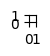

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [3]:
method="Radau"

tmax = 16
step = tmax*10
time_list = np.linspace(0, tmax, step)

## Parameter values

In [4]:
r1=4
r2=3
K1=20
K2=20
a1=0.9
a2=0.8

In [5]:
def LV_model(r,K,a,N_1,N_2):
    return r*(1-(N_1+a*N_2)/K)

In [6]:
def model_competitive_LV(
    t,
    X,
    r1=r1,
    r2=r2,
    K1=K1,
    K2=K2,
    a1=a1,
    a2=a2,
):
    N1,N2 = X
    per_capita1=LV_model(r1,K1,a1,N1,N2)
    per_capita2=LV_model(r2,K2,a2,N2,N1)
    N1_prime=N1*per_capita1
    N2_prime=N2*per_capita2
    return N1_prime,N2_prime

def ode_solver_competitive_LV(
    y0,
    t_span,
    t_eval,
    r1=r1,
    r2=r2,
    K1=K1,
    K2=K2,
    a1=a1,
    a2=a2,
):
    solution_ODE_competitive_LV = solve_ivp(
        fun=model_competitive_LV,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(r1,r2,K1,K2,a1,a2),
        method=method,
    )
    return solution_ODE_competitive_LV

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [7]:
y0 = np.array([5,5])

solution_ODE_competitive_LV = ode_solver_competitive_LV(y0,(t0, tf + days_to_forecast),time_list,r1=r1,r2=r2,K1=K1,K2=K2,a1=a1,a2=a2)
t_computed_competitive_LV, y_computed_competitive_LV = solution_ODE_competitive_LV.t, solution_ODE_competitive_LV.y
Species1, Species2 = y_computed_competitive_LV

for i in range(len(Species1)-1):
    if( np.abs(Species1[i+1]-Species1[i]) > 0.01 ):
        tf=i
print(tf)

t0 = time_list.min()
days_to_forecast = 0

time = np.linspace(t0, tf, step)

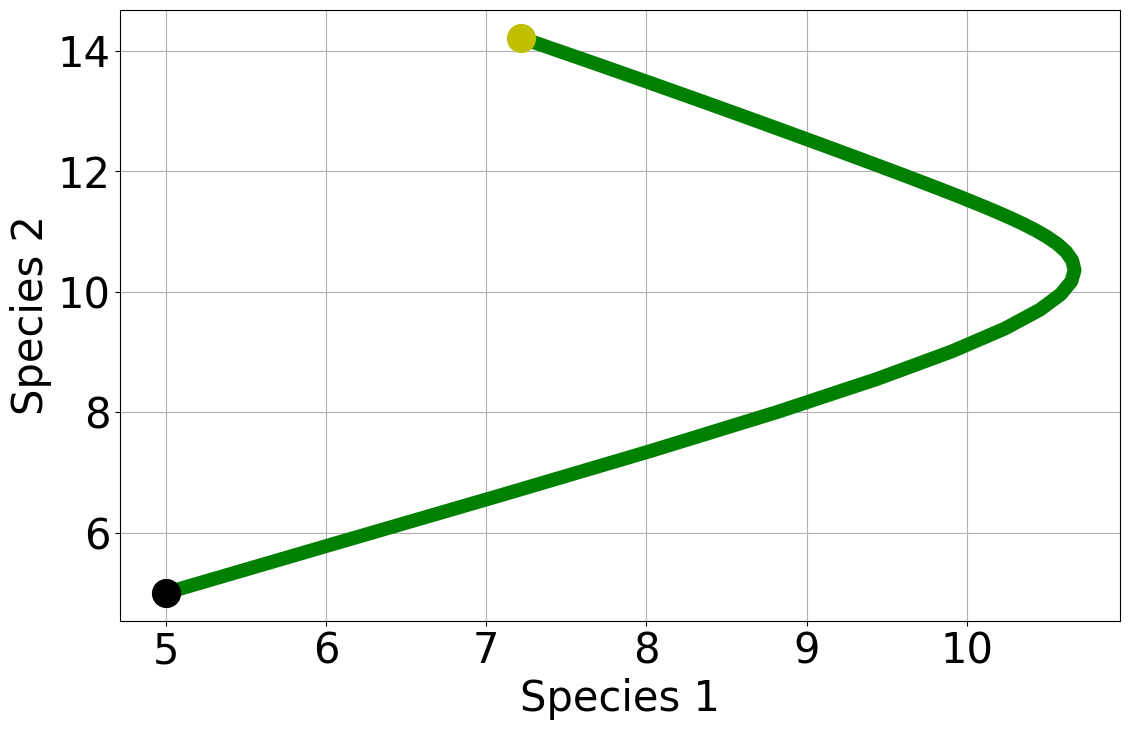

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Species1, Species2, linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(Species1[-1], Species2[-1],"yo",markersize=20)
ax.plot(Species1[0], Species2[0],"ko",markersize=20)

plt.xlabel("Species 1")
plt.ylabel("Species 2")
plt.grid()
plt.rcParams.update({'font.size': 30})

plt.tight_layout()
plt.show()

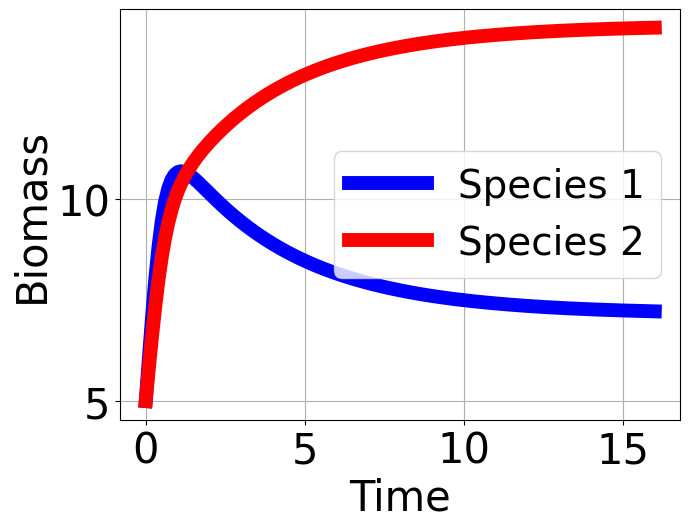

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(time_list, Species1, label="Species 1", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Species2, label="Species 2", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend(fancybox=True, shadow=True)
#plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/Time_series.png', format='png')
plt.tight_layout()
plt.show()

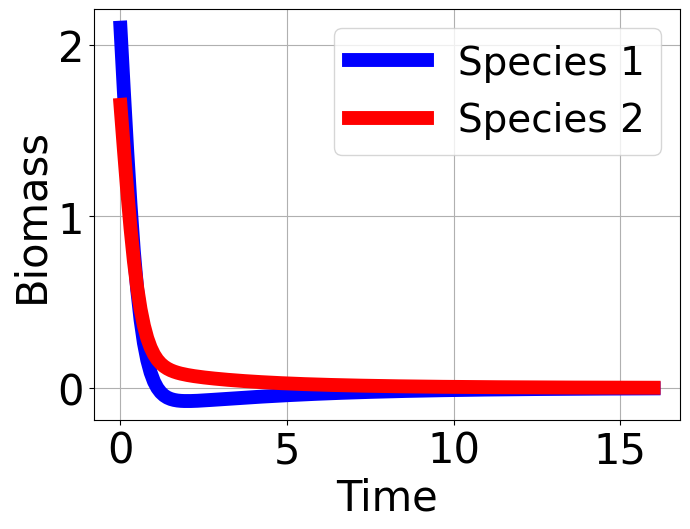

In [10]:
per_capita1=LV_model(r1,K1,a1,Species1,Species2)
per_capita2=LV_model(r2,K2,a2,Species2,Species1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(time_list, per_capita1, label="Species 1", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, per_capita2, label="Species 2", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend(fancybox=True, shadow=True)
#plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/Time_series.png', format='png')
plt.tight_layout()
plt.show()

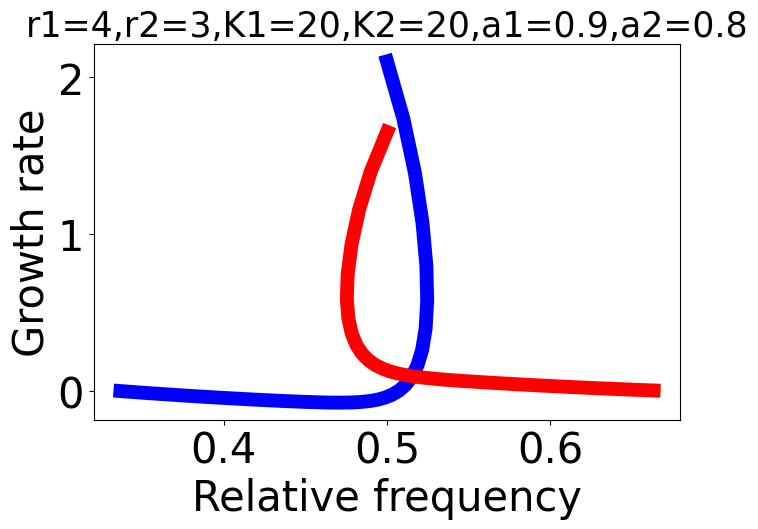

In [17]:
relat_1=Species1/(Species1+Species2)
relat_2=Species2/(Species1+Species2)

per_capita1=LV_model(r1,K1,a1,Species1,Species2)
per_capita2=LV_model(r2,K2,a2,Species2,Species1)

fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(relat_1, per_capita1, label="Species 1", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(relat_2, per_capita2, label="Species 2", linestyle="-", linewidth=10, markersize=12,color="r")
#ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel="Relative frequency",ylabel="Growth rate")
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',K1='+str(K1)+',K2='+str(K2)+',a1='+str(a1)+',a2='+str(a2), fontsize=25)
plt.rcParams.update({'font.size': 30})
plt.tight_layout()
#plt.savefig('img/Time_series.png', format='png')
plt.show()